In [12]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv(r'G:\Rhishi\Reviews.csv')
data = data.head(20000)
data.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


In [14]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


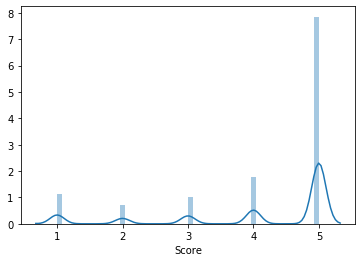

In [15]:
sns.distplot(data['Score'])

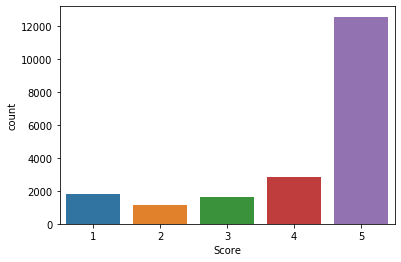

In [16]:
sns.countplot(x='Score', data=data)

In [17]:
data['Text'][150]

"This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!"

In [18]:
text_blob_object = TextBlob(data['Text'][150])
print(text_blob_object.sentiment)

Sentiment(polarity=0.2734848484848485, subjectivity=0.6924242424242424)


In [19]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

data['Sentiment_Polarity'] = data['Text'].apply(find_pol)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


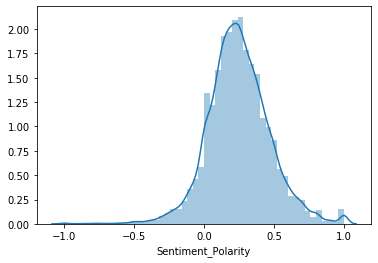

In [20]:
sns.distplot(data['Sentiment_Polarity'])

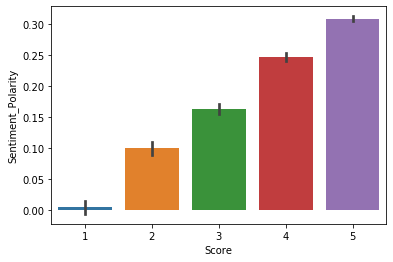

In [21]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=data)

In [25]:
most_negative = data[data.Sentiment_Polarity <0].Text.head()
print(most_negative)

1     Product arrived labeled as Jumbo Salted Peanut...
14    The Strawberry Twizzlers are my guilty pleasur...
50    This oatmeal is not good. Its mushy, soft, I d...
52    This wasn't in stock the last time I looked. I...
62    Arrived in 6 days and were so stale i could no...
Name: Text, dtype: object


In [23]:
data['Text'][1083]

'All my fault. I thought this would be a carton of 3 boxes of cereal.  Instead it was 1 box of cereal for 12.99. Who sells cereal for this price plus $8.00 shipping ? I feel stupid!  Buyer Beware!'

In [26]:
most_positive = data[data.Sentiment_Polarity >0].Text.head()
print(most_positive)

0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
Name: Text, dtype: object


In [23]:
data['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'